# Definición de trayectorias para el Robot Delta de la UPB

Este cuaderno requiere que el lector comprenda la teoría descrita en:

https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_Teoria.ipynb

y partimos de la solución desarrollada en:

https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_CinInv.ipynb

En el siguente cuaderno puede revisar la teoría completa sobre trayectorias simples y compuestas:

https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_Trayectorias.ipynb

## Descripción de la trayectoria a desarrollar

Insertar aquí la descripción

## Inicialización

In [211]:
%reset -sf
%matplotlib inline

In [212]:
import numpy as np
import matplotlib.pyplot as plt
#para realizar animaciones
from matplotlib.animation import FuncAnimation
#para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D

## Creación del lienzo 3D

(-800.0, -400.0)

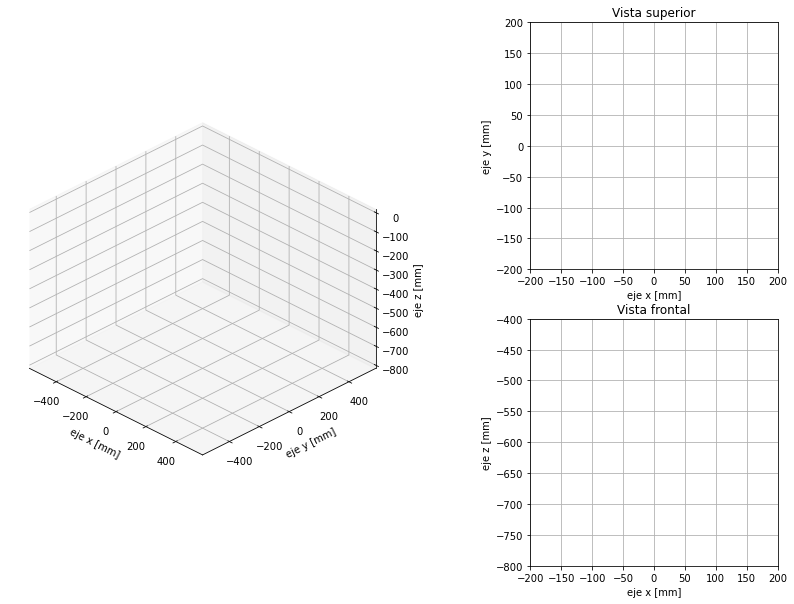

In [213]:
limX = np.array([-400,400])
limY = np.array([-400,400])
limZ = (-800,0)

fig1 = plt.figure(figsize=(15, 10))
ax1 = fig1.add_subplot(2,2,(1,3),projection = '3d', proj_type = 'ortho')
ax1.view_init(elev=30, azim=315)

fEscala = 1.39
ax1.set_xlim3d(limX*fEscala)
ax1.set_ylim3d(limY*fEscala)
ax1.set_zlim3d(-800,0)
ax1.set_xlabel("eje x [mm]")
ax1.set_ylabel("eje y [mm]")
ax1.set_zlabel("eje z [mm]")

ax2 = fig1.add_subplot(2,2,2)
ax2.set_title("Vista superior")
ax2.set_xlabel("eje x [mm]")
ax2.set_ylabel("eje y [mm]")
ax2.axis("scaled")
ax2.grid()
ax2.set_xlim(limX/2)
ax2.set_ylim(limY/2)
ax3 = fig1.add_subplot(2,2,4)
ax3.set_title("Vista frontal")
ax3.set_xlabel("eje x [mm]")
ax3.set_ylabel("eje z [mm]")
ax3.axis("scaled")
ax3.grid()
ax3.set_xlim(limX/2)
ax3.set_ylim([-800,-400])

## Definición de punto HOME, planos de trabajo y seguro, inicialización de trayectoria completa

In [214]:
# Punto HOME
homeX = 0
homeY = 0
homeZ = -528.67

# Plano de trabajo
planoTrabajo = -600
# Plano seguro
planoSeguro = -580

# Trayectoria completa, inicia vacía
txv = np.array([])
tyv = np.array([])
tzv = np.array([])

## Movimiento inicial

mueve la herramienta de HOME al plano seguro

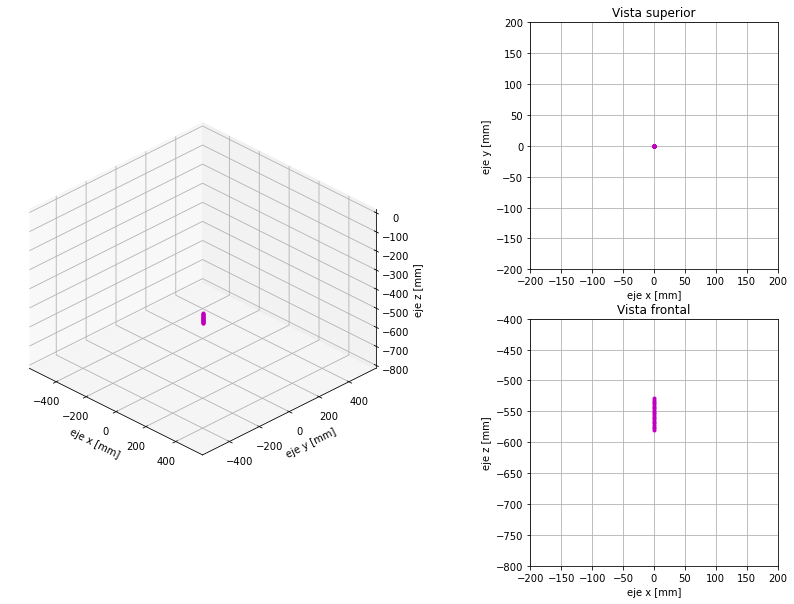

In [215]:
# Punto inicial
pix = homeX
piy = homeY
piz = homeZ

# Punto final
pfx = 0
pfy = 0
pfz = planoSeguro

# Interpolación lineal
numpos = 20

t1xv = np.linspace(pix,pfx,numpos)
t1yv = np.linspace(piy,pfy,numpos)
t1zv = np.linspace(piz,pfz,numpos)

# Añadir movimiento a trayectoria completa
txv = np.append(txv,t1xv)
tyv = np.append(tyv,t1yv)
tzv = np.append(tzv,t1zv)

# El punto inicial de la trayectoria siguiente es el final de la actual
pix = pfx
piy = pfy
piz = pfz

# Descomentar para visualizar
ax1.plot(txv,tyv,tzv,'.m')
ax2.plot(txv,tyv,'.m')
ax3.plot(txv,tzv,'.m')
fig1

## Definición de trayectoria

Para agregar un movimiento a la trayectoria, copie las celdas de abajo
- En la celda de Markdown, describa la trayectoria
- En la celda de código, defina el punto inicial, punto final y la interpolación.

### Movimiento lineal X

Punto inicial: *descripción del punto aquí*

Punto final: *descripción del punto aquí*

Interpolación lineal

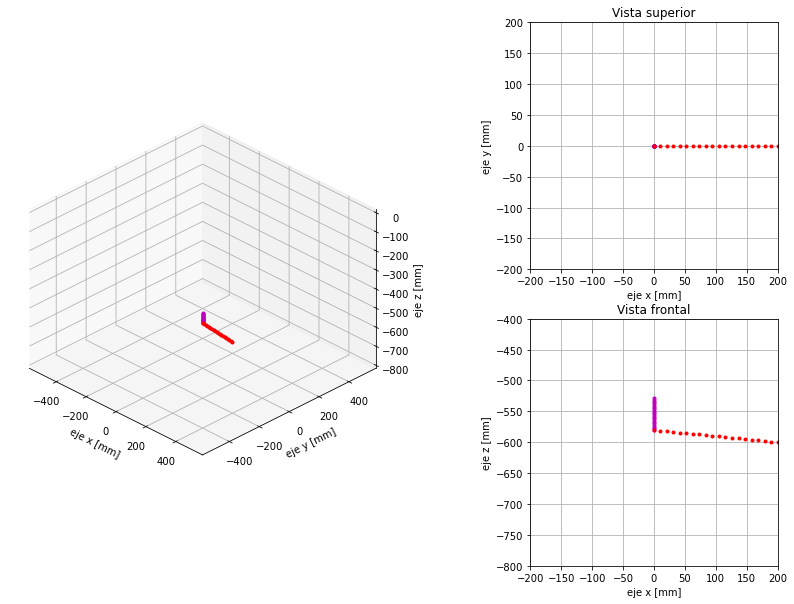

In [216]:
# Punto final
pfx = 200
pfy = 0
pfz = planoTrabajo

# Interpolación lineal
numpos = 20

t1xv = np.linspace(pix,pfx,numpos)
t1yv = np.linspace(piy,pfy,numpos)
t1zv = np.linspace(piz,pfz,numpos)

# Añadir movimiento a trayectoria completa
txv = np.append(txv,t1xv)
tyv = np.append(tyv,t1yv)
tzv = np.append(tzv,t1zv)

# El punto inicial de la trayectoria siguiente es el final de la actual
pix = pfx
piy = pfy
piz = pfz

# Descomentar para visualizar
ax1.plot(t1xv,t1yv,t1zv,'.r')
ax2.plot(t1xv,t1yv,'.r')
ax3.plot(t1xv,t1zv,'.r')
fig1

### Movimiento circular X

Punto inicial: *descripción del punto aquí*

Punto final: *descripción del punto aquí*

Interpolación circunferencia

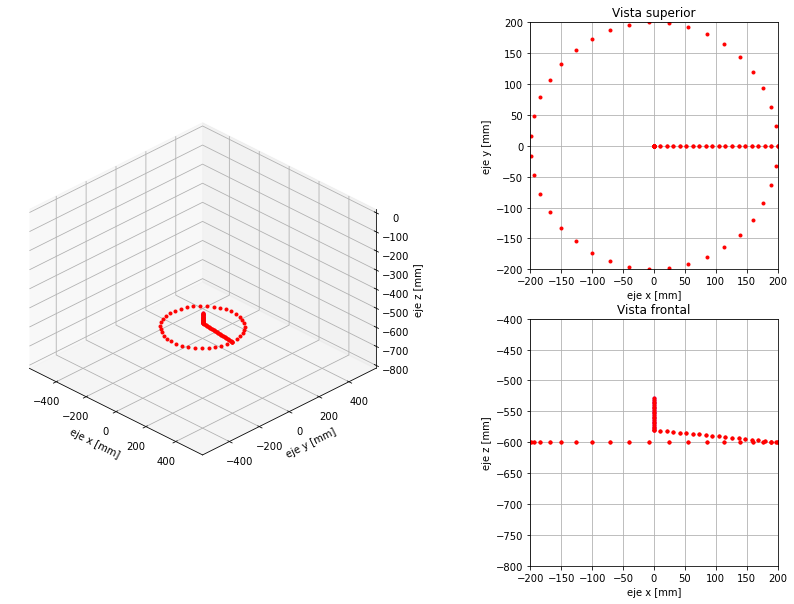

In [217]:
# Punto final
pfx = 200
pfy = 0
pfz = planoTrabajo
# Para circunferencias especificar el rango de movimiento angular
r = 200
aini = 0
afin = 2*np.pi

# Interpolación circunferencia
numpos = 40
alpha = np.linspace(aini,afin,numpos)
t1xv = r*np.cos(alpha)
t1yv = r*np.sin(alpha)
t1zv = pfz + np.zeros(numpos)

# Añadir movimiento a trayectoria completa
txv = np.append(txv,t1xv)
tyv = np.append(tyv,t1yv)
tzv = np.append(tzv,t1zv)

# El punto inicial de la trayectoria siguiente es el final de la actual
pix = pfx
piy = pfy
piz = pfz

# Descomentar para visualizar
ax1.plot(txv,tyv,tzv,'.r')
ax2.plot(txv,tyv,'.r')
ax3.plot(txv,tzv,'.r')
fig1

### Retorno a HOME


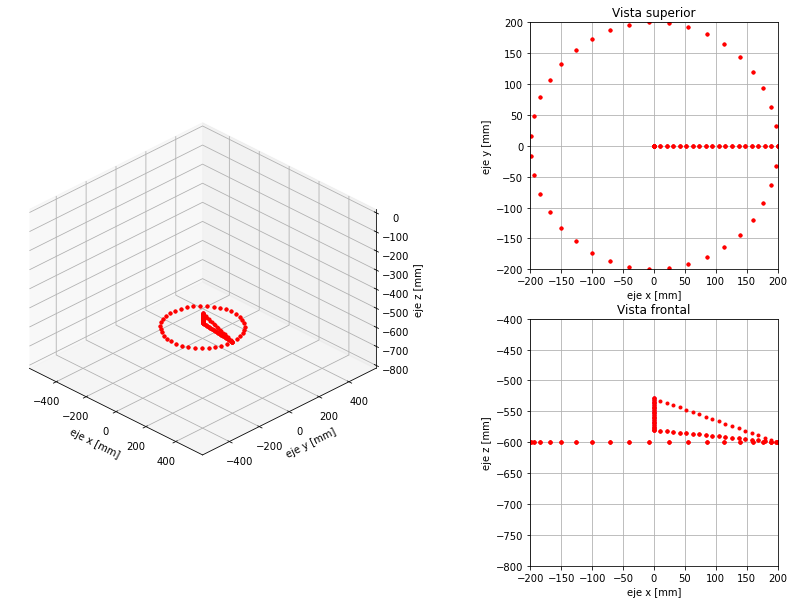

In [218]:
# Punto final
pfx = homeX
pfy = homeY
pfz = homeZ

# Interpolación lineal
numpos = 20
t1xv = np.linspace(pix,pfx,numpos)
t1yv = np.linspace(piy,pfy,numpos)
t1zv = np.linspace(piz,pfz,numpos)

# Añadir movimiento a trayectoria completa
txv = np.append(txv,t1xv)
tyv = np.append(tyv,t1yv)
tzv = np.append(tzv,t1zv)

# El punto inicial de la trayectoria siguiente es el final de la actual
pix = pfx
piy = pfy
piz = pfz

# Descomentar para visualizar
ax1.plot(txv,tyv,tzv,'.r')
ax2.plot(txv,tyv,'.r')
ax3.plot(txv,tzv,'.r')
fig1

Fin Definición de trayectoria

## Exportar trayectoria

Ahora vamos a exportar la trayectoria a un archivo. En la solución al análisis cinemático inverso podremos importar este archivo.

In [202]:
import pickle
with open("trayectoria", "wb") as f:
    pickle.dump([[txv],[tyv],[tzv]], f)